# Home field advantage during Covid
This notebook is the suplement to the following journal article: https://sports-data-jurnalism-2020.blogspot.com/2020/12/first-draft-nfl.html. In here I will do and explain the data steps I took to arrive at my final data and graphs. 
### Topic
The topic is home field advantage in american football during covid. That home teams have a higher chance of winning ceteris paribus is something studyied in various sports. The findings however are relativly consistent, home teams seem to get more favorable calls from referees and are in general more likely to win. Covid now presents an interesting natural experiment: we can compare home team advantage during the last seasons when fans were allowed in the stadium without restrictions, and this season where teams either strongly limited the amount of fans allowed, or even banned them all together. Thus, football data will be analyzed to esteblish if the absence of fans are mittigating the homefield advantage. 
### Structure
This notebook is split into 4 parts: 1-Data gathering, 2-Overall homefield advantage trend, 3-Homefield advantage in close games, 4- Penalty difference home vs away. 
In part one the data obtainment is elaborated on and executed. In part two, I will explore the overall trend of home field advantage across all teams. In part three I will only consider those games that ended in a close manner (a game which outcome could have been changed within one possession/score). And the last part will not look at winning itself as a proxy for home field advantage but will rather look at the penalties against home teams relative to away teams penalties.

In [1]:
#Importing modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import pygal


## 1) Data Gathering
The data used stems from 'NFLfastR' (which is also availible for python) which is a project in which they scrape NFL play-by-play data weekly and build up a database reaching back to 1991. There are multiple ways of downloading their data, the easiest and most reliable however is simply directly reading in their csv data from github. Thus, this is what I will be doing below. One can only download the data for one year at a time, thus I first specify the last 10 years, and then loop over them in order to download all the data from each of these years. Since the data changes every week (when they upload data from the new games) I also downloaded the data and attached it in the submission. 

In [2]:
#data obtainment method is from: https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e
Years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] #enter the years for which you want the data
data = pd.DataFrame() #greate empty dataframe

for i in Years:  #get each year I specified from the github data
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)
data.reset_index(drop=True, inplace=True) #reset index 
#data.to_csv('/home/timothy/Downloads/Data_analysis.csv') I also saved the data so you guys don't have to download it again

## 2) Overall Trend
The first thing I will look at is the overall trend of Homefield advantage over the last 20 years, to see if there is any indication that overall the homefield advantage decreased in the current Covid Season. For that, we need to somehow aggregate how many percent of the times home teams won each season, thus for this I will first create a binary variable that is 1 if the home team won the game and 0 if not. Afterwards, the data structure needs to change. Right now I have play-by-play data. However, for my research question that is not really interesting, as I am only interested in the outcomes of the games. Thus I will group the data by game id and only pick the last case of each game. Next I select only the variables season and home win, and then group these per season and estimate the mean. As the variable is either 1 or 0, the mean will be the percent of games that the home team won (percent because I also multiply the resulting decimal by 100). Lastly I will reset the index inorder to not have the year as an index but rather as a second variable in the dataset. 

In [3]:
#create home team win variable
data['home_win'] = np.where(data['home_score'] > data['away_score'], 1, 0) #variable will either give win (1) if home team scored more points, or loss or tie (0) if not (ties are extremly rare so making an extra category doesn't really add a lot of value)
#create dataset that has one column per game with variables year and home win
win_over_years = data.groupby('game_id').tail(1)[['season', 'home_win']].groupby('season').mean().reset_index() #we group by game id and only keep the last case per group (as the variable of interest is constant withing the grouping) which gives us a df where one row is one game, this is then further grouped by year and the win percentage of the home teams is obtained from that aggregard
print(f'The dataset has {len(win_over_years)} rows')
win_over_years['home_win'] = win_over_years['home_win'].apply(lambda x: x*100) #turning it from decimal into percent

The dataset has 11 rows


Given that we are looking at the last 10 seasons (and the current one) 11 rows sounds perfect. Now that we have the dataset ready, what we do next is to plot the relationship between years and the winning percentage of the home team. This plot looks interesting already, but due to having many different years with different values, making this chart interactive might help the reader by enabeling them to hoover over the different years and seeing the home field win percentage of that year. Thus, an interactive graph will be added for the paper itself. While the bigger picture (the ups and downs) are easier to understand if there are not a lot of numbers in the graph,once the bigger picture is understood some readers might feel curious and wanna know the more exact values of the graph. The interactive pygal graph will enable this

Text(0.5, 1.0, 'Overall Trend of Homefield Win Probability')

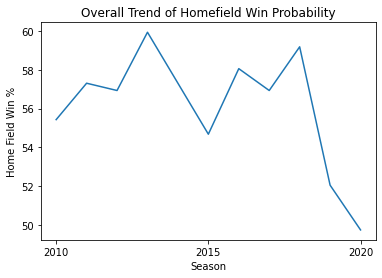

In [4]:
#Plotting the home field advantage (hfa) over seasons (for me)
hfa1 = sns.lineplot(data = win_over_years, x='season', y='home_win') #specify plot
hfa1.xaxis.set_major_locator(ticker.MultipleLocator(5)) #specify tick frequency
hfa1.set(xlabel='Season', ylabel='Home Field Win %') #specify axis lables
hfa1.set_title('Overall Trend of Homefield Win Probability') #specify title


In [5]:
#FIgure 1 paper (pygal)
overall_line = pygal.Line(y_title = 'Home Team Win %', x_title = 'Season')
overall_line.title = 'Overall Trend of Homefield Win Percentage over 11 Seasons'
overall_line.x_labels = win_over_years.season #x axis from 2000 to 2020 in steps of 5
overall_line.add('All Games', win_over_years.home_win)
#overall_line.render()
overall_line.render_in_browser()

file:///tmp/tmp6pz8mc3v.html


I tried embedding the code in Blogger.com with the render method, however while the graph appeared the interactive feature (hovering above the date points go get values) did not work. Thus I opened the pygal graph in the browser, inspected the element, went to the source and copied that html code. Embedding this worked much better in blogger.com and I was able to preserve the interactivity features this way. 

To further investigate the overall trend it is not good to just merely look at 2020 being the season with the lowest home field winning percentage. It's important to emphasise the general variability of home field winning percentage to show how much it changed over the last few seasons. If COVID really has an substiatial effect, then the change from last season to this season should be bigger than during the other seasons. 

<AxesSubplot:xlabel='season', ylabel='home_win_delta'>

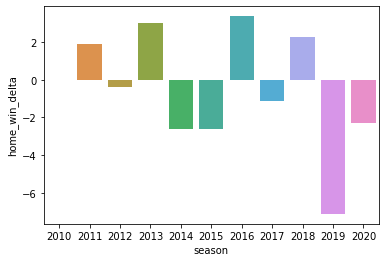

In [6]:
# bar graph for difference in home win percentage from the previous year
win_over_years['home_win_delta'] = win_over_years.home_win.diff(periods = 1)
sns.barplot(data = win_over_years, x = 'season', y = 'home_win_delta') #maybe multiply by 100 to change into percent

We can see that's not really the case. While the home field advantage decreased, the decrease was actually not very large compared to changes in other years.

In [7]:
#Figure 2 in paper
win_over_years_2 = win_over_years[1:] #the first year will have a NAN value because it cannot be compared to previous years (lack of data)
difference_bar = pygal.Bar(y_title = 'Home Win % Change', x_title = 'Season')
difference_bar.title = 'Difference in Home Win Percentage from Previous Season'
difference_bar.x_labels = win_over_years_2.season #x axis from 2000 to 2020 in steps of 5
difference_bar.add('NFL Season', win_over_years_2.home_win_delta)
#overall_line.render()
difference_bar.render_in_browser()

file:///tmp/tmp4p_abeko.html


## 3) Close Games
For this part of the analysis we will not look at all games from the last 10 years, but rather just at the close games. It could be that when the game is on the line in the final minutes, that the fans in the crowd give an extra boost that helps the home team win (or at least it will increas their chances of winning). Thus, in this analysis step I will only investigate those games which outcome could have been changed within one possession. Since the max amount of points a team can get per possession is 8 (6 pts for a Touchdown and 2 pts for a 2 point conversion), I classified all those games that ended with a final score in which the teams were seperated by 8 or less points as close. 

In [8]:
#how many games were even close
total_games = data.groupby('game_id').tail(1)
close_games = data.loc[(data['home_score'] - data['away_score'] < 8) & (data['home_score'] - data['away_score'] > -8)].groupby('game_id').tail(1)
print(f'Out of the {len(total_games)} games played, {len(close_games)} were close, which is about {round(len(close_games) / len(total_games) * 100, 2)} % of the games.')

Out of the 2877 games played, 1368 were close, which is about 47.55 % of the games.


Text(0.5, 1.0, 'Overall Trend of Homefield Win Probability')

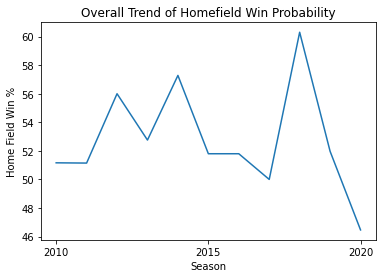

In [9]:
close_wins_over_years = close_games[['season', 'home_win']].groupby('season').mean().reset_index()
close_wins_over_years['home_win'] = close_wins_over_years['home_win'].apply(lambda x: x*100) #turning it from decimal into percent

#for me
hfa2=sns.lineplot(data = close_wins_over_years, x='season', y='home_win')
hfa2.xaxis.set_major_locator(ticker.MultipleLocator(5)) #specify tick frequency
hfa2.set(xlabel='Season', ylabel='Home Field Win %') #specify axis lables
hfa2.set_title('Overall Trend of Homefield Win Probability') #specify title


In [10]:
#Figure 3 in Paper
#interactive Graph
overall_line_2 = pygal.Line(y_title = 'Home Team Win %', x_title = 'Season')
overall_line_2.title = 'Overall Trend of Homefield Win Percentage over 11 Seasons'
overall_line_2.x_labels = close_wins_over_years.season #x axis from 2000 to 2020 in steps of 5
overall_line_2.add('All Games', win_over_years.home_win)
overall_line_2.add('Close Games', close_wins_over_years.home_win)
overall_line_2.render_in_browser()

file:///tmp/tmpjolqln9_.html


## Penalty Yards
Another good indication of home field advantage are the penalty yards against the away team compared to the home team. If corwd noise influences referee decisions then home teams should get less penalty yards against them. Thus, I first created a subset of the dataset with only cases where penalties were given. Next, I created a variable that indicated whether a given penalty was against the home or the away team. Lastly, I grouped the data per season and per home or away penalty, and got the mean scores which were then inputted into a graph. 

<ipython-input-11-80967b04a783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penalties['home_penalty'] = np.where(penalties['home_team'] == penalties['penalty_team'], 'Home', 'Away') #create a binary variable that indicates whether penalty was for home or away team


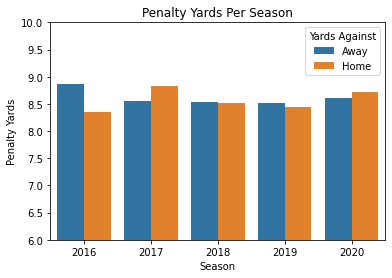

In [11]:
penalties = data.loc[(data['penalty']==1) & (data['season']>2015)]
penalties['home_penalty'] = np.where(penalties['home_team'] == penalties['penalty_team'], 'Home', 'Away') #create a binary variable that indicates whether penalty was for home or away team

penalties = penalties[['season', 'home_penalty', 'penalty_yards']].groupby(['home_penalty', 'season']).mean().reset_index()


penalty_bars = sns.barplot(data = penalties, x = 'season', y = 'penalty_yards', hue = 'home_penalty')
penalty_bars.set(xlabel = 'Season', ylabel = 'Penalty Yards')
penalty_bars.set_ylim(6,10)
penalty_bars.set_title('Penalty Yards Per Season')
penalty_bars.legend().set_title('Yards Against')


In [12]:
#creating home and away datasets
home = penalties.loc[penalties['home_penalty'] == 'Home']
away = penalties.loc[penalties['home_penalty'] == 'Away']

#Graph
penalty_bar = pygal.Bar()
penalty_bar.title = 'Difference in Penalties against Home vs. Away Teams'
penalty_bar.x_labels = home.season #x axis from 2000 to 2020 in steps of 5
penalty_bar.add('Home', home.penalty_yards)
penalty_bar.add('Away', away.penalty_yards)
#overall_line.render()
penalty_bar.render_in_browser()

file:///tmp/tmp490fp5n1.html
